# Titanic Kaggle Project

## Project Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


For more info look at the following info.
https://www.kaggle.com/c/titanic


## Objective: To practice the end-to-end Model Building Process

Using historical data, we will train a model to find the key patterns of the paseengers who lived and who died. These patterns might be combinations of characteristics found in the data provided us, and might look like the following:

- Is passenger over the age of 70? -> Dead 
- Is passenger female and under the age of 10? -> Survived

Once our model is trained, we will be able to use it to determine if I would survive the Titanic's sinking. Luckily  I will also be taking my girlfriend, Amy, aboard my sea-faring experiment. 





## Description of the data.

Kaggle provides us with historical information on about 800 of the Titanic passengers. The following variables will be searched by a collection of statistical and machine learning model to find insights on what groups of people lived and died. The data is as follows.

### Target Variable (What we want to predict.)
- Survived - Did the Person survive the Titanic?
Dead = 0, Alive = 1


### Predictors (What might determine if a passenger died.)
 - Pclass - What passenger class were they in?
 - Age - Age
 - SibSp - Number of Siblings and Spouses the person had aboard.
 - Parch - Number of parents and children.
 - Fare- How much was their voyage cost.
 - Sex - Sex
 - Embarked - Port of embarkation.

In [1]:
import pandas as pd

# Retrieve Dataset
Titanic = pd.read_csv('titanic_train.csv').drop(['Cabin','Ticket'], axis =1)

#Set index
Titanic = Titanic.set_index('PassengerId')

Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Insights from Our Data:

Here I will show a few graphs that might allow an introductory understanding of what the population of people aboard the Titanic looked like. 

An important note here is that the above dataset does not include every passenger on the Titanic.  As this is a Kaggle competition, the data that we do not have has been retained by Kaggle so that our model may be "scored" later on. The full dataset can be found on Wikipedia.

### More people died than survived.

We have around a 40% survival rate in our population of Titanic farers.

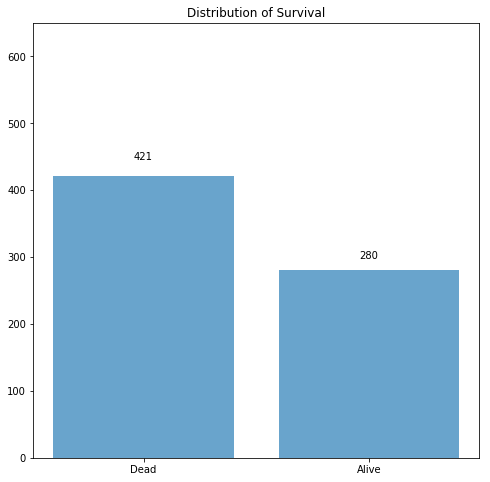

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from Prep import titanic, autolabel
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Bar plot of survival distribution
plt.figure(figsize=(8,8))
barr = plt.bar( titanic.Survived.value_counts().index,  titanic.Survived.value_counts(), alpha = 0.67, )
plt.title('Distribution of Survival')
autolabel(barr, plt.gca())
plt.xticks([0,1], ['Dead','Alive'])

plt.ylim((0,650))
barr = plt.gcf()
plt.rcParams["figure.figsize"] = (12,6)

plt.show()

### Lots of babies and 30 year olds

 A lot of babies, with a average age of around 30.

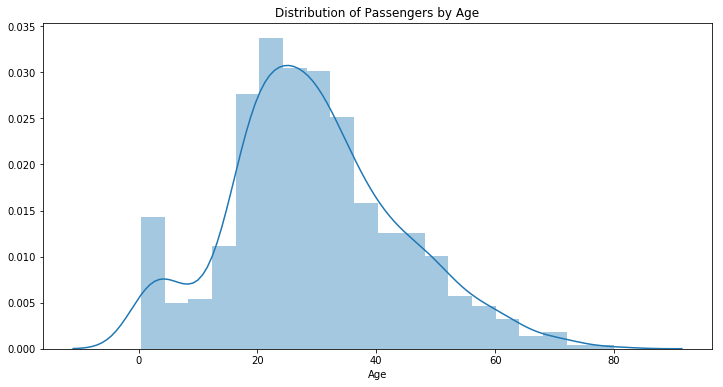

In [3]:
plt.figure(figsize=(12,6))
sns.distplot(titanic.Age, )
plt.title('Distribution of Passengers by Age')
plt.show()

### Men were more likely to have died than women.

Men in our population had a 19% survival rate, while women held a 74% survival rate. 

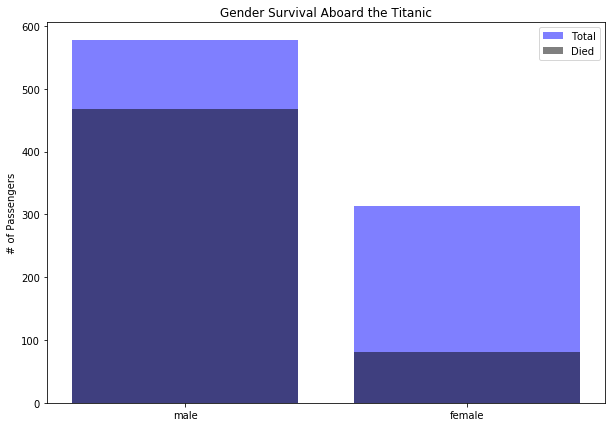

In [4]:
dead_subframe = Titanic[Titanic.Survived == 0]

plt.figure(figsize = (10,7))
plt.bar( Titanic['Sex'].value_counts().index,  Titanic['Sex'].value_counts(), label = 'alive', color = 'blue', alpha = 0.5 )
plt.bar( dead_subframe['Sex'].value_counts().index,  dead_subframe['Sex'].value_counts(), label = 'dead', color = 'black', alpha = 0.5 )
plt.legend(['Total','Died'])
plt.title('Gender Survival Aboard the Titanic')
plt.ylabel('# of Passengers')

plt.show()

### Children were more likely to survive.

Children up to age 10 had a 60% survival rate, wheras passengers older than 10 had a survival rate of 38%.

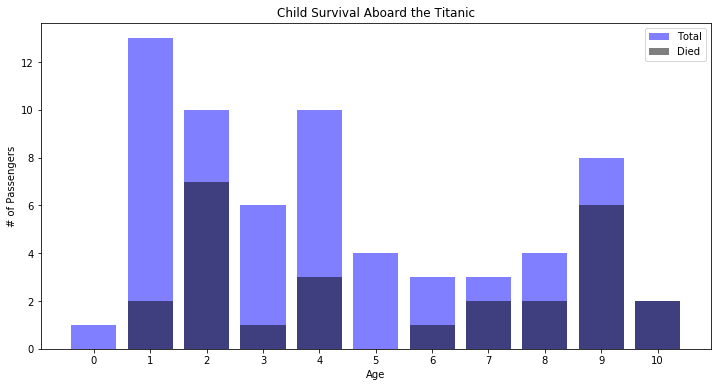

In [5]:
babies_subframe = Titanic[Titanic['Age'] <= 10].round(0)
sad = babies_subframe[babies_subframe.Survived==0]

plt.figure(figsize=(12, 6))
plt.bar( babies_subframe['Age'].value_counts().index,  babies_subframe['Age'].value_counts(), label = 'dead', color = 'blue', alpha = 0.5 )
plt.bar( sad['Age'].value_counts().index,  sad['Age'].value_counts(), label = 'dead', color = 'black', alpha = 0.5 )
plt.legend(['Total','Died'])
plt.title('Child Survival Aboard the Titanic')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])

plt.show()

# Feature Importances

Which characteristics of a passenger were the most indicative to whether they lived or died? 


### Gender, age, and fare .

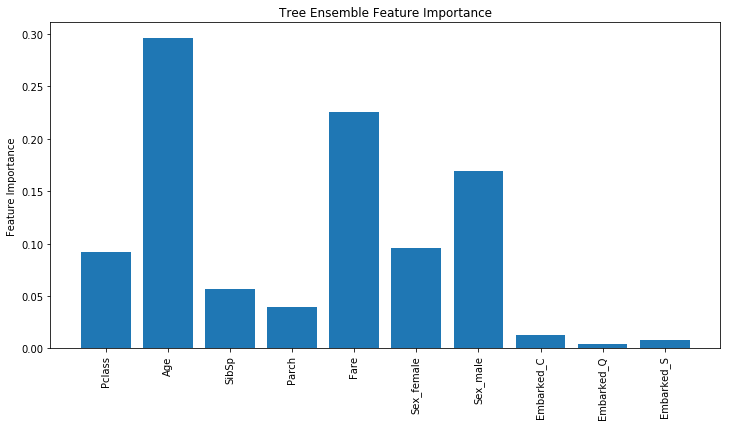

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
X, y = titanic.iloc[:,1:], titanic.iloc[:,0]
df = titanic

feat_labels = df.columns[1:]
t = RandomForestClassifier()
t.fit(X, y)
plt.figure(figsize=(12,6))
plt.bar(range(len(feat_labels)), t.feature_importances_)
plt.xticks(range(len(feat_labels)), feat_labels, rotation =90)
plt.ylabel('Feature Importance')
plt.title('Tree Ensemble Feature Importance')
plt.show()

##  What does our data look like?

To get a true visualization of our data, we would need to map it into high dimensional space (7 dimensions). Instead we choose to project our data on 2d and 3d space. By doing this we can visually determine whether certain groups of passengers were more likely to survive than others. If survival is indeed not random, when we plot our data we will see that those who survived are very clustered together.


### The Method:

We will be using Principal Component Analysis to project our data down to 2 and 3 dimensions. This will result in visualizations that show the geometric shape of the data and clustering that is inherent within.  



### 2D Projection

Though there is some mixing, we see that the data is indeed clustered. We see data points representing passengers that survived are grouped together. Next we will project onto 3d space, which will increase seperability.

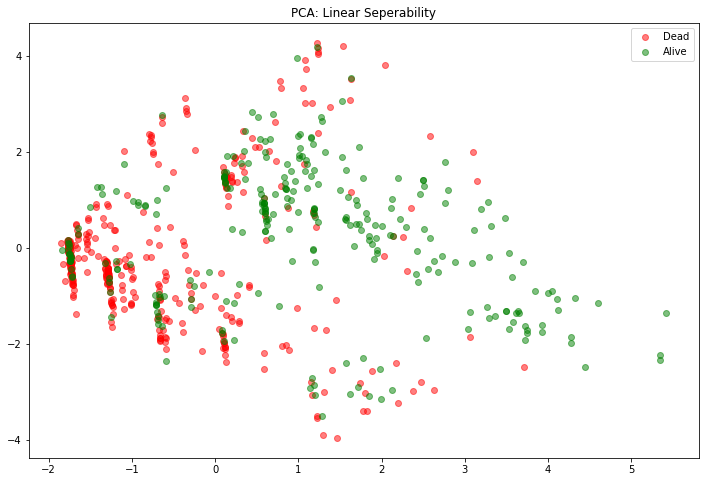

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_pca1 = X.copy()
X_pca1 = StandardScaler().fit_transform(X_pca1)

#instantiate PCA
pca = PCA(n_components = 2)
X_redu1 = pca.fit_transform(X_pca1)

died1 = X_redu1[y == 0]
live1 = X_redu1[y == 1]
comp =[0,1]

fig = plt.figure(figsize = (12,8))
plt.scatter(died1[:,0].reshape(1,-1), died1[:,1].reshape(1,-1), c = 'red', label = 'Dead', alpha = 0.5)
plt.scatter(live1[:,0].reshape(1,-1), live1[:,1].reshape(1,-1), c = 'green', label = 'Survived', alpha = 0.5)
plt.title('PCA: Linear Seperability')
plt.legend(['Dead', 'Alive'])

plt.show()


### 3D Projection

Every time we increase the number of dimensions we may increase the seperability of the passengers who survived and those who died. As a result the true 7 dimensional data structure may stand to be more clustered than the two graphs we show here.

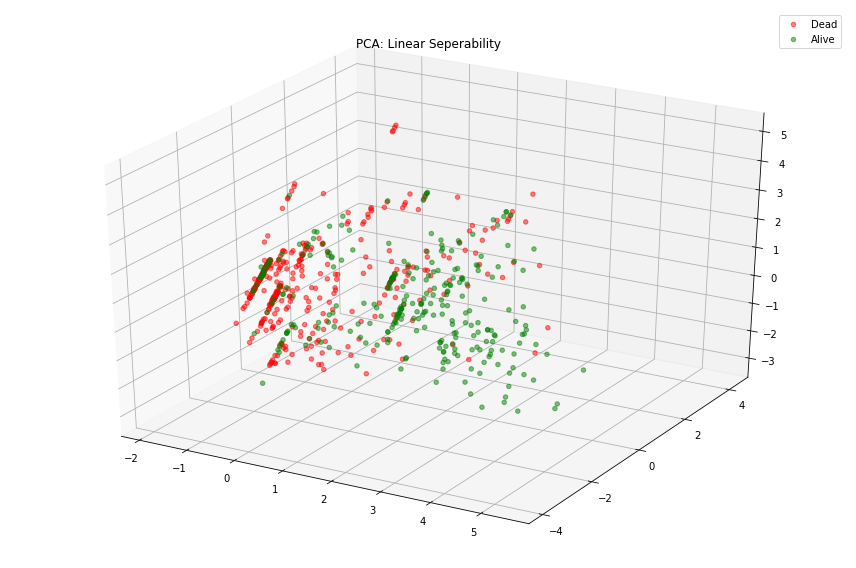

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Scaling down Data
X_pca2 = X.copy()
X_pca2 = StandardScaler().fit_transform(X_pca2)

#instantiate PCA
pca = PCA(n_components = 3)
X_redu2 = pca.fit_transform(X_pca2)

died = X_redu2[y == 0]
live = X_redu2[y == 1]
comp =[0,1]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d', )
ax.scatter(died[:,0].reshape(1,-1), died[:,1].reshape(1,-1),died[:,2].reshape(1,-1), c = 'red', label = 'Dead', alpha = 0.5)
ax.scatter(live[:,0].reshape(1,-1), live[:,1].reshape(1,-1),live[:,2].reshape(1,-1), c = 'green', label = 'Survived', alpha = 0.5)
plt.title('PCA: Linear Seperability')
plt.legend(['Dead', 'Alive'])
plt.tight_layout()

plt.show()

### Takeaway:
We now know that some characteristics that passengers held made them more likely to survive the Titanic. If it had been otherwise, and survival was solely based on luck or chance, there would be no grouping or clustering in the data. What we can now do is train a model that will find the underlying patterns in the data, in the hopes of creating a decision rule that will determine whether a new person lived or died.

## Training a Model

I used six different machine learning models and compared their performance through a training and validation procedure. These models were optimized through a gridsearch to find their optimal hyperparameters. Below is their performance (measured by accuracy) on the validation set.

![title](validation.png)

## Final Model: Gradient Boosting Machine


The overall best performer was a gradient boosting machine, which we can get to 77% accuracy. Below I will create visualizations of the decision boundaries a similar model would make on the 2d projections that we previously made.

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [10]:
svc = GradientBoostingClassifier()
sc = StandardScaler()

#Without Feature Selection
pipe = Pipeline([('sc', sc), ('clf', svc)])
fit_params = {'clf__loss': ['deviance', 'exponential'],
             'clf__learning_rate': [0.001, 0.01, 0.1],
             'clf__max_depth': [4,5,6,7],
             'clf__min_samples_split': [ 4, 5, 6, 7]}

gs = GridSearchCV(pipe, fit_params, n_jobs = -1, cv = 10, return_train_score = True)
gs.fit(X_redu1, y)

print('Best performing classifier parameters (score {}):\n{}'.format(gs.best_score_,gs.best_params_))


Best performing classifier parameters (score 0.7960057061340942):
{'clf__learning_rate': 0.01, 'clf__loss': 'exponential', 'clf__max_depth': 5, 'clf__min_samples_split': 5}


## 2D Decision Boundary

In [11]:
import os
os.chdir('C:\\Users\\harri\\Documents\\GitHub\\ML-Notes')
from VisualFuncs import VDR

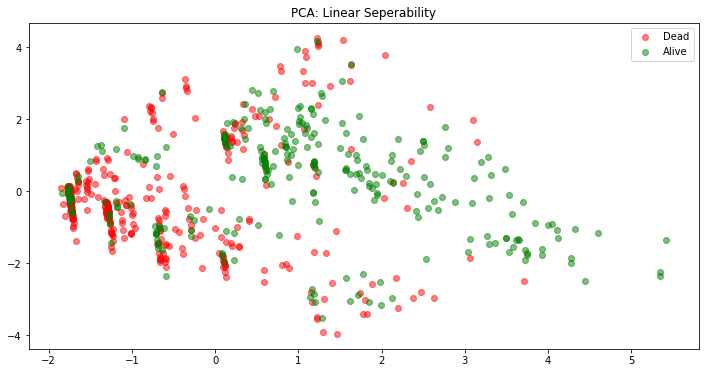

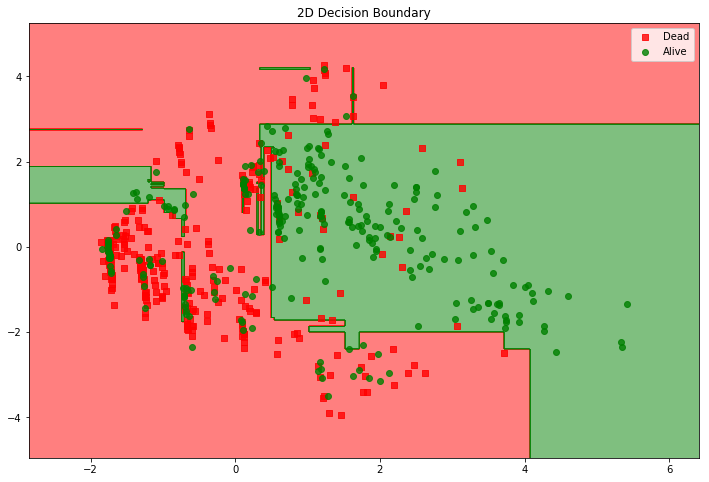

In [12]:
pipe.set_params(clf__learning_rate = gs.best_params_['clf__learning_rate'])
pipe.set_params(clf__loss = gs.best_params_['clf__loss'])
pipe.set_params(clf__max_depth = gs.best_params_['clf__max_depth'])
pipe.set_params(clf__min_samples_split = gs.best_params_['clf__min_samples_split'])
pipe.fit(X_redu1, y)

fig = plt.figure(figsize = (12,6))
plt.scatter(died1[:,0].reshape(1,-1), died1[:,1].reshape(1,-1), c = 'red', label = 'Dead', alpha = 0.5)
plt.scatter(live1[:,0].reshape(1,-1), live1[:,1].reshape(1,-1), c = 'green', label = 'Survived', alpha = 0.5)
plt.title('PCA: Linear Seperability')
plt.legend(['Dead', 'Alive'])

plt.show()
VDR(X_redu1, y , pipe, class_names = ['Dead', 'Alive'])
plt.title('2D Decision Boundary')
plt.show()

## Did I survive?

### The Setup:

For this exercise I will take a cruise with my lovely girlfriend, Amy Robb. We will have no other family members or children, be in second class, and have an average fare price. We will embark from port Q. (Chosen at random.)

In [13]:
d = {'Names':['Amy', "Harrison"], 'Pclass':[2,2], 'Age': [21, 22], 'SibSp':[0,0], 'Parch': [0,0], 'Fare':[30,30], 'Sex_female':[1,0], 'Sex_male': [0,1], 'Embarked_C':[0,0], 'Embarked_Q':[1,1], 'Embarked_S':[0,0]}

us = pd.DataFrame(data =d)
us

,Names,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,Amy,2,21,0,0,30,1,0,0,1,0
1,Harrison,2,22,0,0,30,0,1,0,1,0


### The Results

In [14]:
svc = GradientBoostingClassifier()
sc = StandardScaler()

#Without Feature Selection
pipe = Pipeline([('sc', sc), ('clf', svc)])
fit_params = {'clf__loss': ['deviance', 'exponential'],
             'clf__learning_rate': [0.001, 0.01, 0.1, ],
             'clf__max_depth': [3,4,5,6,],
             'clf__min_samples_split': [2,3,4,5]}

gs = GridSearchCV(pipe, fit_params, n_jobs = -1, cv = 10, return_train_score = True)
gs.fit(X, y)

pipe.set_params(clf__loss = gs.best_params_['clf__loss'])
pipe.set_params(clf__learning_rate = gs.best_params_['clf__learning_rate'])
pipe.set_params(clf__max_depth = gs.best_params_['clf__max_depth'])
pipe.set_params(clf__min_samples_split = gs.best_params_['clf__min_samples_split'])
pipe.fit(X, y)
print('Best performing classifier parameters (score {}):\n{}'.format(gs.best_score_,gs.best_params_))

Best performing classifier parameters (score 0.8273894436519258):
{'clf__learning_rate': 0.1, 'clf__loss': 'deviance', 'clf__max_depth': 3, 'clf__min_samples_split': 2}


In [15]:
pred = pipe.predict(us.iloc[:,1:])

In [16]:
us['Survived']=pred
us = us.iloc[:,[11,0,1,2,3,4,5,6,7,8,9,10]]
us['Survived']=us['Survived'].map({0:'Dead', 1:'Alive'})
us.iloc[:,:2]

,Survived,Names
0,Alive,Amy
1,Dead,Harrison


# I Died,  Amy Lived
That's just the way it goes, I guess Hollywood got it right.

![title](frozen_jack.jpeg)